# Thuật toán Ứng dụng - Phase 1: Phân tích dữ liệu

Ở bước này mình sẽ tiến hành import các thư viện cần thiết cho bài, bao gồm:
- `pandas` (pd): Thư viện tính toán và phân tích dữ liệu.
- `numpy` (np): Thư viện thuần về tính toán và các tác vụ tính toán với mảng một cách nâng cao.
- `matplotlib.pyplot` (plt): Thư viện tạo biểu đồ.
- `seaborn` (sns): Cũng là thư viện tạo biểu đồ nhưng dựa trên `matplotlib`, tạo ra các loại biểu đồ nâng cao hơn - dùng ở Stage 3 khi phân tích xu hướng của dữ liệu và các Outliers (giá trị ngoại lai)

Trước tiên, mình sẽ check qua thông tin về file dataset bằng các câu lệnh Linux.

In [2]:
__import__("os").system("wc -l insurance_claims.csv")

1

1001 line tất cả, trừ đi headerline -> 1000 row

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Tiến hành đọc file dataset và biểu diễn dạng bảng.

In [3]:
df = pd.read_csv('insurance_claims.csv')
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


Phát hiện thấy có một số hàng có giá trị "?" - not found, tiến hành thay thế hành NaN - not available.

In [4]:
df.replace('?', np.nan, inplace = True)
df.head(20)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,NaN,42300,4700,4700,32900,Saab,92x,1996,N,NaN


## Nhận định và phân tích cấu trúc dữ liệu
Trước tiên mình sẽ chạy lệnh `df.describe()` để lấy thông tin về thống kê của các cột trong dataset này. Các thông tin này bao gồm:
- Count: Số lượng các giá trị khác NULL.
- Mean: Số bình quân (gt trung bình?).
- Std: Độ lệch chuẩn.
- Min: GTNN.
- 25%: Giá trị nằm từ khoảng (nhỏ nhất - 25%).
- 50%: từ 25% - 50%
- 75%: từ 50% - 75%
- Max: GTLN.

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Tiếp tục chạy `df.info()` để hiểu thêm về dữ liệu.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

## Giải thích qua các cột của dataset này
1. months_as_customer: Số tháng mà người mua bảo hiểm đã sở hữu bảo hiểm.
2. age: Tuổi của người mua BH.
3. policy_number: Mã hợp đồng BH.
4. policy_bind_date: Ngày ký hợp đồng.
5. policy_state: Bang nơi Khách hàng kí HĐ.
6. policy_csl: Giới hạn bảo hiểm (1/3, 2/3 thiệt hại...)
7. policy_deductable: Số tiền mà người mua BH phải trả trước khi được công ty BH thanh toán.
8. policy_annual_premium: Khoản tiền đóng hàng năm.
9. umbrella_limit: Giới hạn của hình thức bảo hiểm "ô dù" (hình thức này yêu cầu cty BH bồi thường khoản lớn hơn so với Hợp đồng)
10. insured_zip: mã ZIP của người ký HĐ.
11. insured_sex: giới tính của ng ký HĐ.
12. insured_education_level: trình độ học vấn.
13. insured_occupation: nghề nghiệp
14. insured_hobbies: sở thích.
15. insured_relationship: tình trạng hôn nhân
16. capital-gains: khoản lãi mà người dùng BH nhận dc sau khi hoàn tất các chi phí.
17. capital-loss: tương tự nhưng là khoản lỗ.
18. incident_date: ngày xảy ra sự cố.
19. incident_type: hình thức của sự cố.
20. collision_type: nếu bị đâm, hỏng hóc như thế nào?.
21. incident_severity: mức độ nghiêm trọng
22. authorities_contacted: đã liên lạc với nhà chức trách nào?
23. incident_state: nơi xảy ra sự cố.
24. incident_city: thành phố nơi xảy ra sự cố.
25. incident_location: địa chỉ cụ thể nơi xảy ra sự cố.
26. incident_hour_of_the_day: khung giờ xảy ra.
27. number_of_vehicles_involved: số lượng các phương tiện có liên quan.
28. property_damage: có xảy ra thiệt hại về tài sản hay không.
29. bodily_injuries: số lượng thương vong về người.
30. witnesses: số lượng nhân chứng.
31. police_report_available: có báo cáo của cảnh sát về sự việc hay không.
32. total_claim_amount: tổng số lượng tiền đc bồi thường.
33. injury_claim: số lượng bồi thường cho thiệt hại sức khỏe.
34. property_claim: số lượng bồi thường cho thiệt hại tài sản.
35. vehicle_claim: số lượng bồi thường cho thiệt hại phương tiện.
36. auto_make: nhà sản xuất của xe gặp tai nạn.
37. auto_model: model xe gặp tai nạn.
38. auto_year: năm sản xuất của xe gặp tai nạn.
39. **fraud_reported**: Quan trọng - có bị báo cáo là một vụ lừa đảo không.
40. _c39: không rõ

# Thuật toán Ứng dụng - Phase 2: Xử lý dữ liệu

Tính số lượng giá trị NaN - không xác định

In [7]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Để dễ nhìn hơn thì sẽ visualize dưới dạng bar chart sử dụng thư viện `missingno`

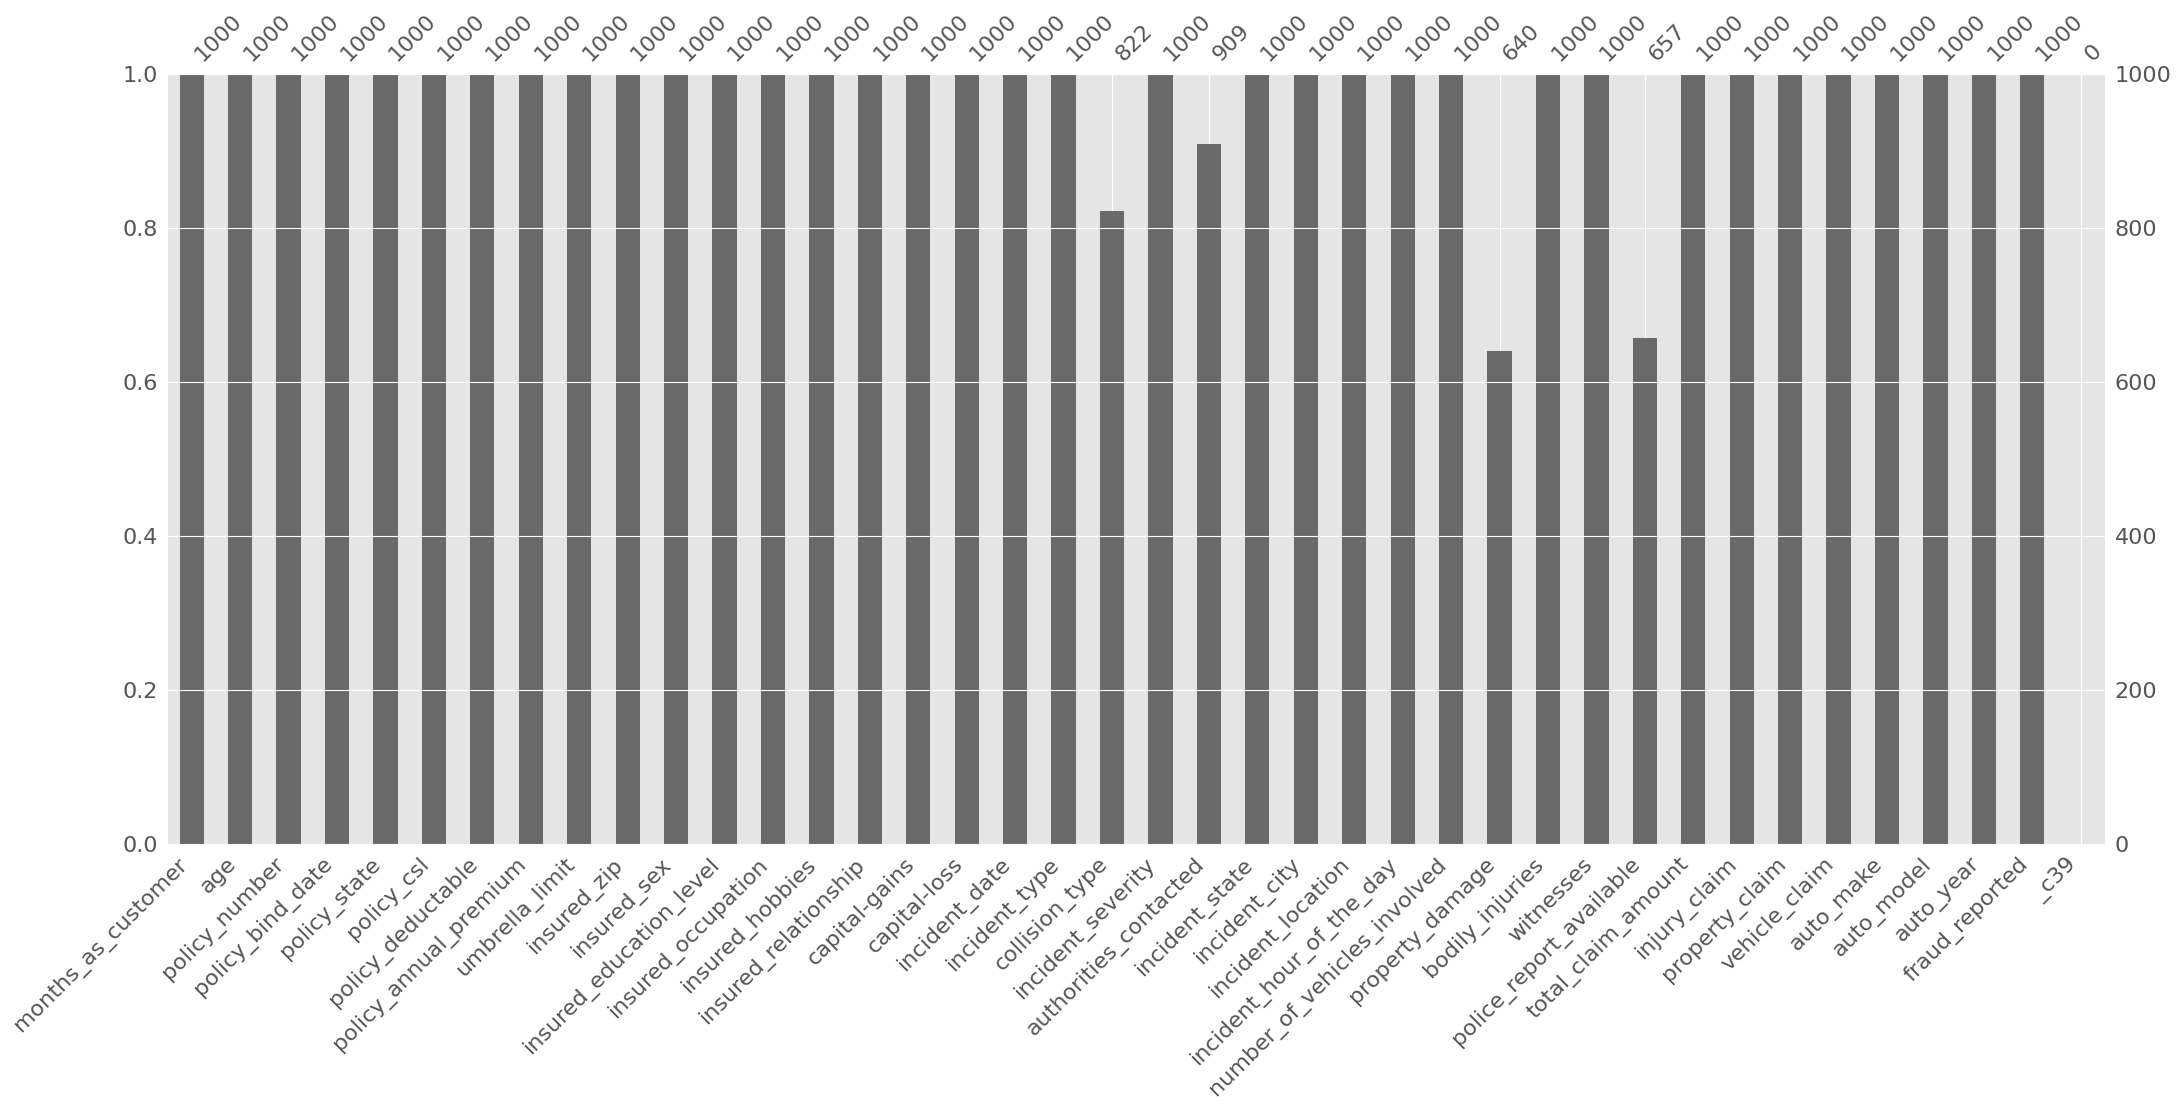

In [9]:
import missingno as msno

msno.bar(df)
plt.show()

Có thể thấy `collision_type`, `property_damage`, `police_report_available` là 3 trường có dấu hiệu thiếu. Nhận thấy đây là một trong các trường có thể được sử dụng để xác định hành vi lừa đảo, mình sẽ k remove mà fill **giá trị xuất hiện nhiều nhất** trong cột đấy thay thế cho giá trị khuyết.

In [10]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
# Thực hiện tính toán N/A lại để kiểm tra
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Lúc này để tìm hiểu thêm về mối tương quan giữa các giá trị, từ đó lọc đi các giá trị không cần thiết, mình sẽ đi theo 2 hướng:
- Lập ma trận hiệp phương sai
- Check các giá trị có độ unique cao

In [16]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()


ValueError: could not convert string to float: '2014-10-17'

<Figure size 1800x1200 with 0 Axes>

Trong ma trận hiệp phương sai, cần chú ý các điểm sau:
- Đường chéo sẽ luôn bằng 1 vì một giá trị sẽ luôn có qhe chặt chẽ với chính nó.
- Màu cáng tối thì quan hệ càng yếu, màu càng sáng thì qhe với nhau càng chặt chẽ.

Do đó, với các giá trị âm thì mình có thể remove được, qua ma trận sẽ thấy được các giá trị sau không có nhiều sự liên quan: auto_year, witnesses, bodily_injures, capital_loss, insured_zip, umbrella_limit, policy_annual_premium, policy_number

In [13]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Đây là số lượng giá trị của 1 column, ví dụ như incident_location = 1000, tức là có đến 1k địa điểm tai nạn khác nhau (tất cả các case đều có địa điểm tai nạn khác nhau), vì vậy hướng làm sạch ở đây sẽ là:
- remove các giá trị có độ unique cao (nhưng giữ lại các giá trị có mức độ quan hệ chặt chẽ cao)

--> có thể remove được: policy_number, policy_bind_date, policy_state, insured_zip, incident_location, incident_date, incident_state, incident_city, insured_hobbies, auto_make, auto_model, auto_year, witnesses, bodily_injures, umbrella_limit, policy_annual_premium, _c39 (đã gộp cả 2 hướng)

In [17]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39', 'witnesses',
           'bodily_injuries', 'umbrella_limit', 'policy_annual_premium']

df.drop(to_drop, inplace = True, axis = 1)

In [18]:
df.head(20)

,months_as_customer,age,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,MALE,MD,craft-repair,husband,53300,0,...,Police,5,1,YES,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,MALE,MD,machine-op-inspct,other-relative,0,0,...,Police,8,1,NO,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,FEMALE,PhD,sales,own-child,35100,0,...,Police,7,3,NO,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,...,Police,5,1,NO,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,MALE,Associate,sales,unmarried,66000,-46000,...,NaN,20,1,NO,NO,6500,1300,650,4550,N
5,256,39,250/500,1000,FEMALE,PhD,tech-support,unmarried,0,0,...,Fire,19,3,NO,NO,64100,6410,6410,51280,Y
6,137,34,250/500,1000,MALE,PhD,prof-specialty,husband,0,-77000,...,Police,0,3,NO,NO,78650,21450,7150,50050,N
7,165,37,100/300,1000,MALE,Associate,tech-support,unmarried,0,0,...,Police,23,3,NO,YES,51590,9380,9380,32830,N
8,27,33,100/300,500,FEMALE,PhD,other-service,own-child,0,0,...,Police,21,1,NO,YES,27700,2770,2770,22160,N
9,212,42,100/300,500,MALE,PhD,priv-house-serv,wife,0,-39300,...,Other,14,1,NO,NO,42300,4700,4700,32900,N


Check lại mức độ chặt chẽ của các giá trị.

In [34]:
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

ValueError: could not convert string to float: '250/500'

<Figure size 1800x1200 with 0 Axes>

Tiếp tục thấy được rằng age<->months_as_customer tỷ lệ thuận với nhau, cũng như cặp total_claim_amount<->(injury_claim, property_claim).
Vì thế 2 giá trị này là thừa và có thể loại bỏ được.

In [20]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [21]:
df.head(20)

,months_as_customer,policy_csl,policy_deductable,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,...,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,...,Major Damage,Police,5,1,YES,YES,6510,13020,52080,Y
1,228,250/500,2000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,...,Minor Damage,Police,8,1,NO,NO,780,780,3510,Y
2,134,100/300,2000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,...,Minor Damage,Police,7,3,NO,NO,7700,3850,23100,N
3,256,250/500,2000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,...,Major Damage,Police,5,1,NO,NO,6340,6340,50720,Y
4,228,500/1000,1000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,...,Minor Damage,NaN,20,1,NO,NO,1300,650,4550,N
5,256,250/500,1000,FEMALE,PhD,tech-support,unmarried,0,0,Multi-vehicle Collision,...,Major Damage,Fire,19,3,NO,NO,6410,6410,51280,Y
6,137,250/500,1000,MALE,PhD,prof-specialty,husband,0,-77000,Multi-vehicle Collision,...,Minor Damage,Police,0,3,NO,NO,21450,7150,50050,N
7,165,100/300,1000,MALE,Associate,tech-support,unmarried,0,0,Multi-vehicle Collision,...,Total Loss,Police,23,3,NO,YES,9380,9380,32830,N
8,27,100/300,500,FEMALE,PhD,other-service,own-child,0,0,Single Vehicle Collision,...,Total Loss,Police,21,1,NO,YES,2770,2770,22160,N
9,212,100/300,500,MALE,PhD,priv-house-serv,wife,0,-39300,Single Vehicle Collision,...,Total Loss,Other,14,1,NO,NO,4700,4700,32900,N


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   months_as_customer           1000 non-null   int64 
 1   policy_csl                   1000 non-null   object
 2   policy_deductable            1000 non-null   int64 
 3   insured_sex                  1000 non-null   object
 4   insured_education_level      1000 non-null   object
 5   insured_occupation           1000 non-null   object
 6   insured_relationship         1000 non-null   object
 7   capital-gains                1000 non-null   int64 
 8   capital-loss                 1000 non-null   int64 
 9   incident_type                1000 non-null   object
 10  collision_type               1000 non-null   object
 11  incident_severity            1000 non-null   object
 12  authorities_contacted        909 non-null    object
 13  incident_hour_of_the_day     1000 

Lúc này mình sẽ tiến hành cô lập giá trị `fraud_reported` vì đây là giá trị target của model này.
Tiến hành chia thành 2 biến X, y.
- X: các properties/feature (23 giá trị trừ fraud_reported)
- y: target - fraud_reported

Chia ra như thế này để train cũng như đánh giá model.

> Giải thích có thể khó hiểu, do vậy nên tra đoạn code dưới đây trên ChatGPT.

In [23]:
# Lưu lại DataFrame thành csv trước khi tiến hành các bước tiếp theo
df.to_csv('data_cleaned.csv')
__import__("os").system("ls -lavh data_cleaned.csv")

1

In [24]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

## Thuật toán Ứng dụng - Phase 2.5: Chuyển dạng dữ liệu

Có thể thấy, trong dataset hiện tại có rất nhiều trường chứa chuỗi chứ không phải số, vì vậy để thuận tiện cho việc train model học máy cũng như duy trì tính ổn định trong dataset, cần phải chuyển các trường String thành dạng số.

Trong bước này, mình sẽ làm việc với các biến X (features), y (target) đã khai báo từ trước đó.

In [25]:
# Các trường không phải số đều sẽ có type <object>
nonNumber_df = X.select_dtypes(include = ['object'])

In [26]:
nonNumber_df.head(20)

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO
5,250/500,FEMALE,PhD,tech-support,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,NO,NO
6,250/500,MALE,PhD,prof-specialty,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NO,NO
7,100/300,MALE,Associate,tech-support,unmarried,Multi-vehicle Collision,Front Collision,Total Loss,Police,NO,YES
8,100/300,FEMALE,PhD,other-service,own-child,Single Vehicle Collision,Front Collision,Total Loss,Police,NO,YES
9,100/300,MALE,PhD,priv-house-serv,wife,Single Vehicle Collision,Rear Collision,Total Loss,Other,NO,NO


In [27]:
# Kiểm tra các giá trị trong mỗi cột (unique only)
for col in nonNumber_df.columns:
    print(f"{col}: \n{nonNumber_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [28]:
nonNumber_df = pd.get_dummies(nonNumber_df, drop_first = True)

### Giải thích về hàm get_dummies()

Giả sử chúng ta có một bảng như sau:
|Color|
|-----|
|Red|
|Blue|
|Green|
|Green|
|Red|

Sau khi chạy qua hàm `get_dummies`, bảng đó sẽ trở thành:
|Color_Red|Color_Blue|Color_Green|
|---------|----------|-----------|
|1|0|0|
|0|1|0|
|0|0|1|
|0|0|1|
|1|0|0|

Với 1 là xuất hiện, 0 là không xuất hiện

In [29]:
nonNumber_df.head(20)

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
6,True,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
9,False,False,True,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,False,False


In [30]:
# Lọc các features chứa giá trị số nguyên (không phải 0/1)
number_df = X.select_dtypes(include = ['int64'])
number_df.head(20)

,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim
0,328,1000,53300,0,5,1,6510,13020,52080
1,228,2000,0,0,8,1,780,780,3510
2,134,2000,35100,0,7,3,7700,3850,23100
3,256,2000,48900,-62400,5,1,6340,6340,50720
4,228,1000,66000,-46000,20,1,1300,650,4550
5,256,1000,0,0,19,3,6410,6410,51280
6,137,1000,0,-77000,0,3,21450,7150,50050
7,165,1000,0,0,23,3,9380,9380,32830
8,27,500,0,0,21,1,2770,2770,22160
9,212,500,0,-39300,14,1,4700,4700,32900


Lúc này tất cả các giá trị đã là số (int), bây giờ thì ghép 2 phần lại với nhau thôi.

In [31]:
# final dataset
X = pd.concat([number_df, nonNumber_df], axis = 1)
X.head(20)

,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,53300,0,5,1,6510,13020,52080,True,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,0,0,8,1,780,780,3510,True,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,35100,0,7,3,7700,3850,23100,False,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,48900,-62400,5,1,6340,6340,50720,True,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,66000,-46000,20,1,1300,650,4550,False,...,True,False,True,False,False,False,False,False,False,False
5,256,1000,0,0,19,3,6410,6410,51280,True,...,True,False,False,False,False,True,False,False,False,False
6,137,1000,0,-77000,0,3,21450,7150,50050,True,...,False,False,True,False,False,False,False,True,False,False
7,165,1000,0,0,23,3,9380,9380,32830,False,...,False,False,False,True,False,False,False,True,False,True
8,27,500,0,0,21,1,2770,2770,22160,False,...,False,False,False,True,False,False,False,True,False,True
9,212,500,0,-39300,14,1,4700,4700,32900,False,...,True,False,False,True,False,False,True,False,False,False


In [32]:
# Tiếp tục export dữ liệu
X.to_csv('data_encoded_int.csv')
__import__('os').system('ls -lavh data_encoded_int.csv')

1

In [33]:
X.head(20)

,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,53300,0,5,1,6510,13020,52080,True,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,0,0,8,1,780,780,3510,True,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,35100,0,7,3,7700,3850,23100,False,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,48900,-62400,5,1,6340,6340,50720,True,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,66000,-46000,20,1,1300,650,4550,False,...,True,False,True,False,False,False,False,False,False,False
5,256,1000,0,0,19,3,6410,6410,51280,True,...,True,False,False,False,False,True,False,False,False,False
6,137,1000,0,-77000,0,3,21450,7150,50050,True,...,False,False,True,False,False,False,False,True,False,False
7,165,1000,0,0,23,3,9380,9380,32830,False,...,False,False,False,True,False,False,False,True,False,True
8,27,500,0,0,21,1,2770,2770,22160,False,...,False,False,False,True,False,False,False,True,False,True
9,212,500,0,-39300,14,1,4700,4700,32900,False,...,True,False,False,True,False,False,True,False,False,False


## Thuật toán Ứng dụng - Phase 3: Biểu diễn dữ liệu

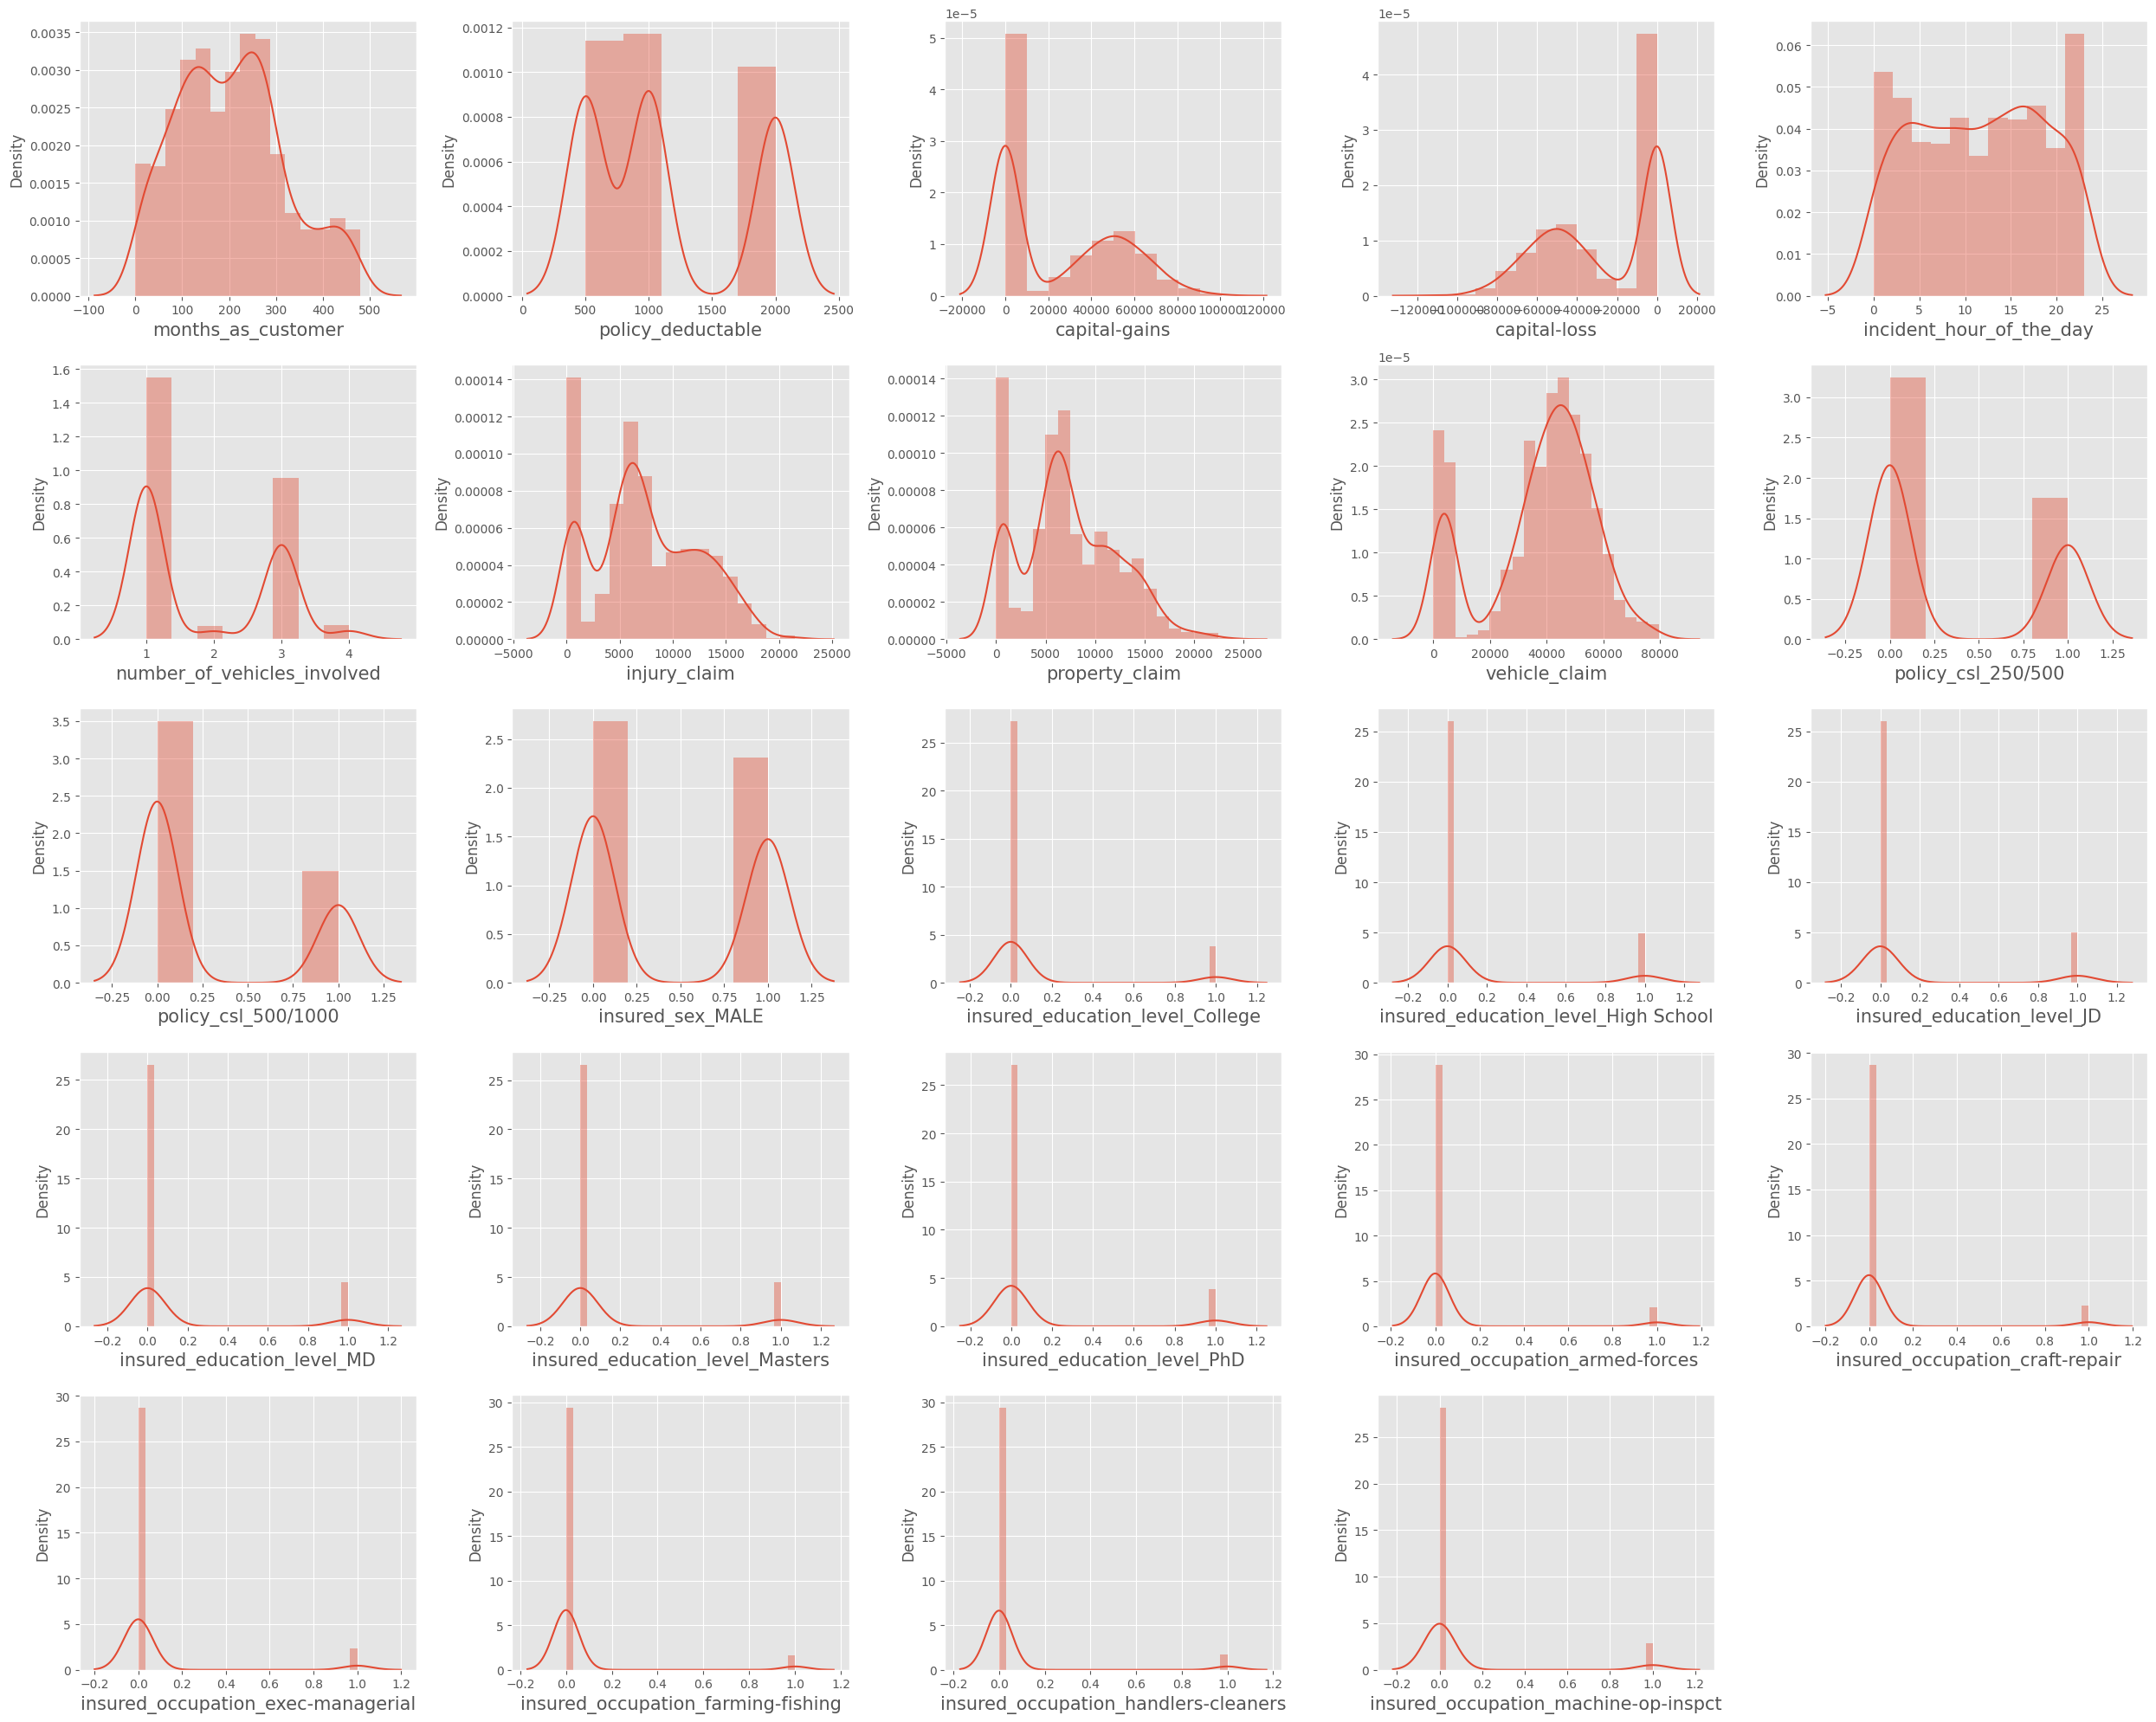

In [36]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

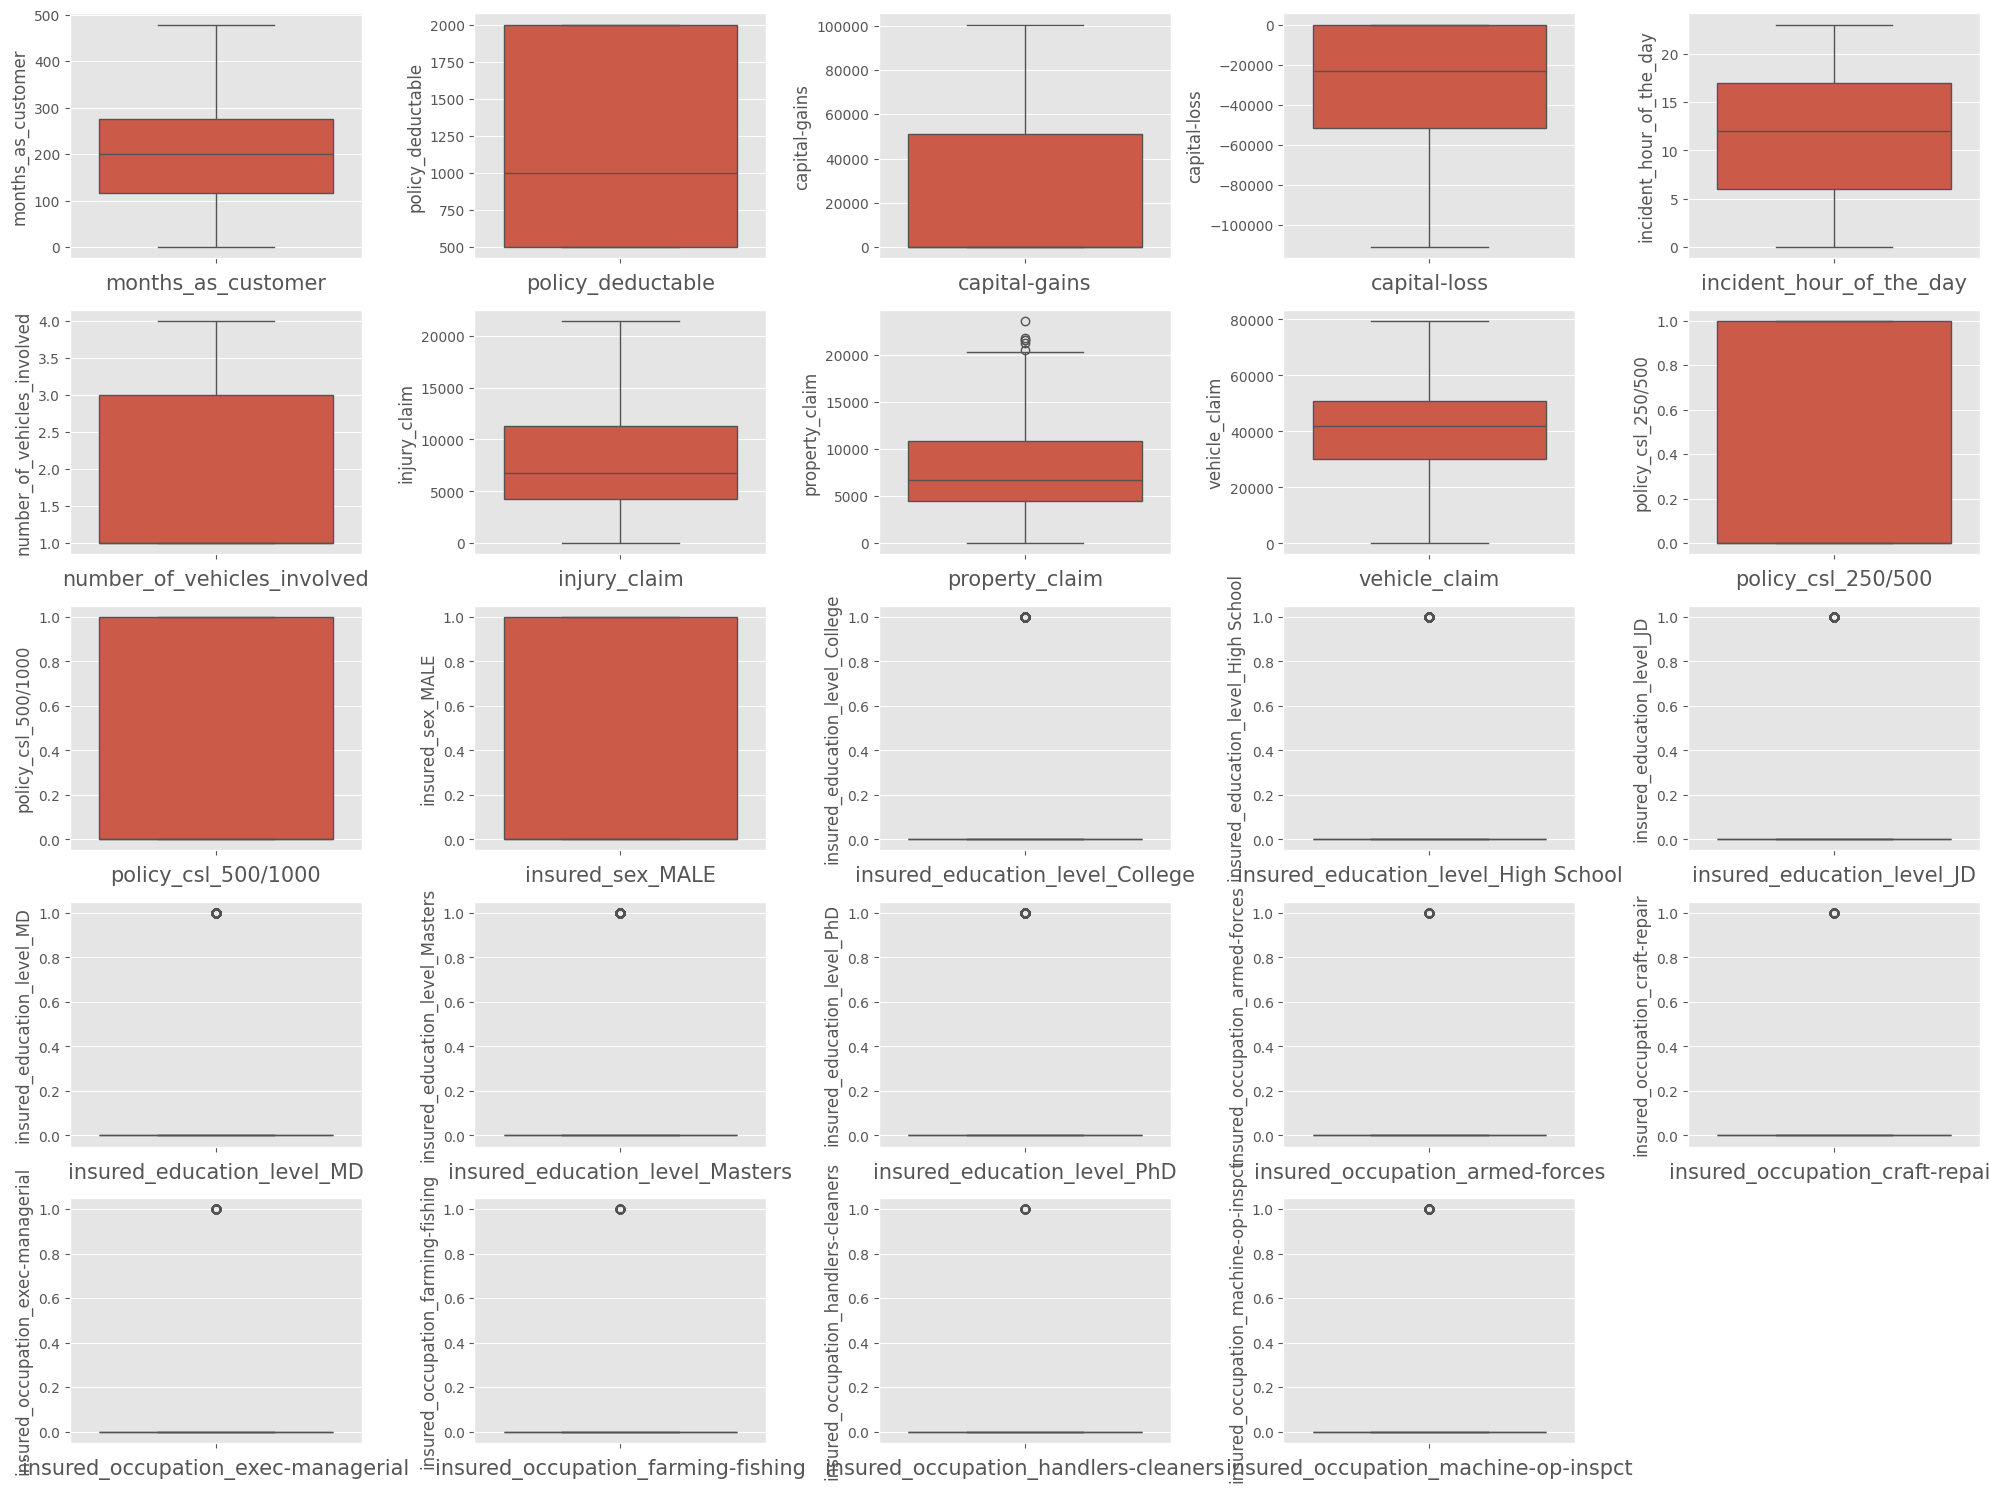

In [37]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [38]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
X_train.head()


,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
759,155,1000,83600,0,0,1,8060,8060,32240,True,...,False,False,True,False,False,False,False,False,False,False
30,64,1000,53200,0,22,4,12600,12600,50400,True,...,False,True,False,False,False,False,False,False,False,False
795,297,500,0,-59500,0,3,5550,5550,33300,True,...,False,True,False,True,False,True,False,False,False,True
132,112,500,60000,-54800,21,3,8500,8500,34000,False,...,False,False,False,False,False,False,False,False,False,False
887,441,500,24000,-50500,4,1,640,640,5120,True,...,True,False,True,False,False,False,False,False,False,False


In [49]:
print(df.columns)

Index(['months_as_customer', 'policy_csl', 'policy_deductable', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')


In [51]:
num_df = X_train[['months_as_customer', 'policy_deductable',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'injury_claim', 'property_claim',
       'vehicle_claim']]


In [44]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [45]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim
759,-0.423582,-0.211878,2.091424,0.947562,-1.692868,-0.837166,0.122626,0.120782,-0.307499
30,-1.200383,-0.211878,1.009618,0.947562,1.498303,2.087715,1.048911,1.063508,0.654253
795,0.788570,-1.030993,-0.883541,-1.164469,-1.692868,1.112755,-0.389483,-0.400416,-0.251362
132,-0.790642,-1.030993,1.251601,-0.997636,1.353250,1.112755,0.212398,0.212148,-0.214290
887,2.017795,-1.030993,-0.029484,-0.845002,-1.112655,-0.837166,-1.391258,-1.419971,-1.743773


In [46]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)


In [47]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)


In [48]:
X_train.head()

,months_as_customer,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
759,-0.423582,-0.211878,2.091424,0.947562,-1.692868,-0.837166,0.122626,0.120782,-0.307499,True,...,False,False,True,False,False,False,False,False,False,False
30,-1.200383,-0.211878,1.009618,0.947562,1.498303,2.087715,1.048911,1.063508,0.654253,True,...,False,True,False,False,False,False,False,False,False,False
795,0.788570,-1.030993,-0.883541,-1.164469,-1.692868,1.112755,-0.389483,-0.400416,-0.251362,True,...,False,True,False,True,False,True,False,False,False,True
132,-0.790642,-1.030993,1.251601,-0.997636,1.353250,1.112755,0.212398,0.212148,-0.214290,False,...,False,False,False,False,False,False,False,False,False,False
887,2.017795,-1.030993,-0.029484,-0.845002,-1.112655,-0.837166,-1.391258,-1.419971,-1.743773,True,...,True,False,True,False,False,False,False,False,False,False


In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [53]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7613333333333333
Test accuracy of KNN is : 0.728
[[182   0]
 [ 68   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.84       182
           Y       0.00      0.00      0.00        68

    accuracy                           0.73       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.53      0.73      0.61       250

